In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('carprice.csv')

In [3]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [4]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [5]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')
    df[c] = df[c].fillna(0)

In [7]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

missing = ['engine_hp', 'engine_cylinders', 'market_category', 'number_of_doors','engine_fuel_type']

for m in missing:
    df[m] = df[m].fillna(0)

In [8]:
df.number_of_doors = df.number_of_doors.astype(str)
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors       object
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
df['price']  = pd.DataFrame(df.msrp)

In [10]:
del df['msrp']

In [11]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,price
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


# Question 1

What is the most frequent observation (mode) for the column transmission_type?

- AUTOMATIC
- MANUAL
- AUTOMATED_MANUAL
- DIRECT_DRIVE

In [12]:
mode_transmission = df['transmission_type'].mode()[0]
mode_transmission

'automatic'

In [13]:
df.transmission_type.value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

In [14]:
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'price'],
      dtype='object')

In [15]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors       object
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
price                  int64
dtype: object

In [16]:
## 'automatic'

# Question 2

Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.


What are the two features that have the biggest correlation in this dataset?

- engine_hp and year
- engine_hp and engine_cylinders
- highway_mpg and engine_cylinders
- highway_mpg and city_mpg

In [17]:
numerical = [ 'year', 'engine_hp',
       'engine_cylinders', 
       'highway_mpg', 'city_mpg', 'popularity', 'price']

In [18]:
corr_numerical= df[numerical].corr()
corr_numerical

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.073049,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.031409,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.045226,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.020991,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.003217,-0.157676
popularity,0.073049,0.031409,0.045226,-0.020991,-0.003217,1.000000,-0.048476
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,-0.048476,1.000000


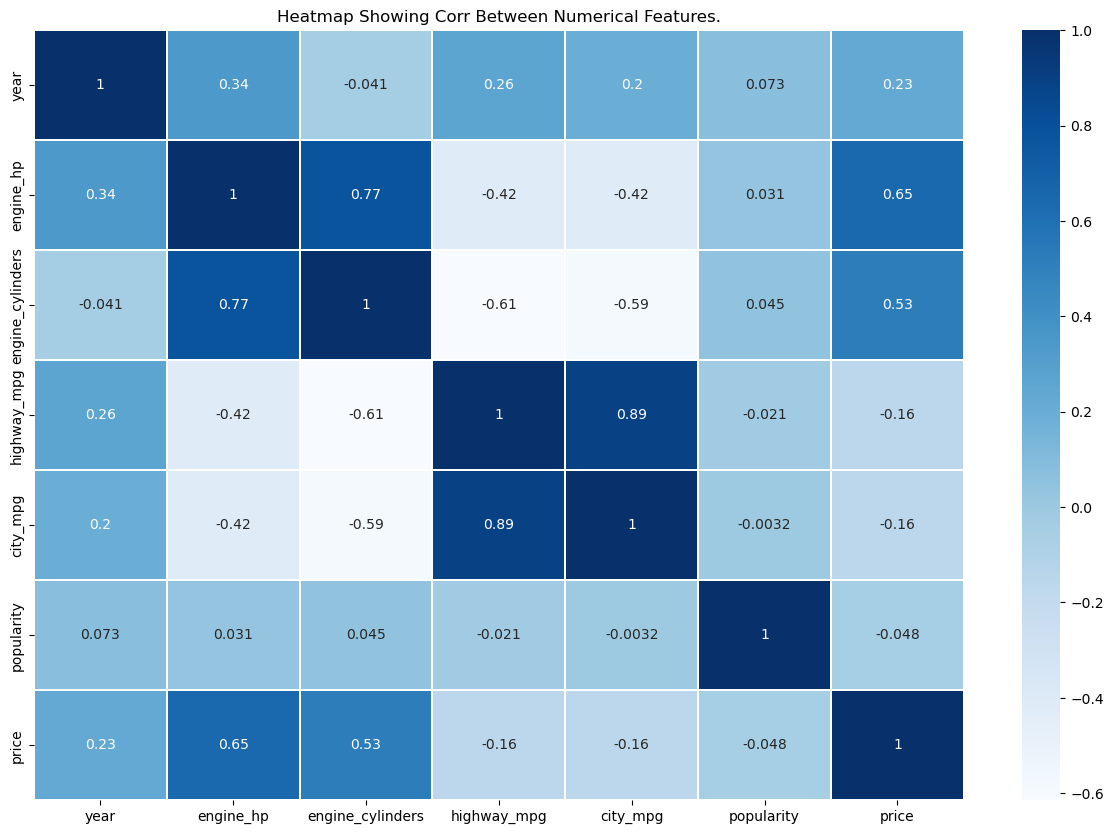

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_numerical, annot = True, linewidths = .2, cmap ='Blues')
plt.title('Heatmap Showing Corr Between Numerical Features.')
plt.show()

In [20]:
corr_numerical.unstack().sort_values(ascending =False)

year              year                1.000000
engine_hp         engine_hp           1.000000
popularity        popularity          1.000000
city_mpg          city_mpg            1.000000
engine_cylinders  engine_cylinders    1.000000
highway_mpg       highway_mpg         1.000000
price             price               1.000000
city_mpg          highway_mpg         0.886829
highway_mpg       city_mpg            0.886829
engine_hp         engine_cylinders    0.774851
engine_cylinders  engine_hp           0.774851
price             engine_hp           0.650095
engine_hp         price               0.650095
engine_cylinders  price               0.526274
price             engine_cylinders    0.526274
engine_hp         year                0.338714
year              engine_hp           0.338714
                  highway_mpg         0.258240
highway_mpg       year                0.258240
price             year                0.227590
year              price               0.227590
             

In [21]:
# city_mpg          highway_mpg         0.886829

## Make price binary
- Now we need to turn the price variable from numeric into a binary format.
- Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [22]:
data_class = df.copy()
mean_price = df['price'].mean()
data_class['above_average'] = np.where(data_class['price']>=mean_price , 1, 0)

## Split the data
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.

In [23]:
data_class = data_class.drop('price', axis =1)

In [24]:
df_full_train, df_test = train_test_split(data_class, test_size=0.2, random_state= 42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state= 42)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,above_average
0,mitsubishi,endeavor,2011,premium_unleaded_(recommended),225.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,19,15,436,0
1,kia,borrego,2009,regular_unleaded,276.0,6.0,automatic,rear_wheel_drive,4.0,0,midsize,4dr_suv,21,17,1720,0
2,lamborghini,gallardo,2012,premium_unleaded_(required),570.0,10.0,manual,all_wheel_drive,2.0,"exotic,factory_tuner,high-performance",compact,convertible,20,12,1158,1
3,chevrolet,colorado,2016,regular_unleaded,200.0,4.0,automatic,rear_wheel_drive,4.0,diesel,compact,crew_cab_pickup,27,20,1385,0
4,pontiac,vibe,2009,regular_unleaded,158.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,26,20,210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7143,toyota,sienna,2016,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,0,large,passenger_minivan,25,18,2031,0
7144,chevrolet,hhr,2009,premium_unleaded_(recommended),260.0,4.0,manual,front_wheel_drive,4.0,"factory_tuner,performance",compact,wagon,29,21,1385,0
7145,hyundai,veracruz,2012,regular_unleaded,260.0,6.0,automatic,front_wheel_drive,4.0,crossover,midsize,4dr_suv,22,17,1439,0
7146,mitsubishi,expo,1993,regular_unleaded,136.0,4.0,manual,front_wheel_drive,2.0,hatchback,compact,2dr_hatchback,26,19,436,0


In [27]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

## Question 3

Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.

Round it to 2 decimals using round(score, 2)

What is their mutual information score?

**Options:**

- 0.26
- 0
- 0.10
- 0.16

In [28]:
 categorical= ['make', 'model', 'transmission_type','vehicle_style']


In [29]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)
df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name ='MI')
#apply(calculate_mi)

In [30]:
round(df_mi,2)

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


In [31]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [32]:
## transmission_type	0.02

## Question 4

**Now let's train a logistic regression.**

- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
- To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95

In [33]:
df[numerical].columns
num = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'popularity']

In [34]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
train_dict = df_train[categorical + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [36]:
model = LogisticRegression(solver='lbfgs', C=1.0,max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[categorical + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.93


In [37]:
# Aprox = 0.95

# Question 5

Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- year
- engine_hp
- transmission_type
- city_mpg

In [38]:
features = categorical + num

In [39]:
organic_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)
    
    X_train = dv.transform(train_dict)
    
    model = LogisticRegression(solver='sag', C=1.0, random_state=42)
    model.fit(X_train, y_train)
    
    val_dict = df_val[subset].to_dict(orient='records')
    X_val =dv.transform(val_dict)
    
    y_pred = model.predict(X_val)
    
    score = accuracy_score(y_val, y_pred)
    print(c, organic_score - score, score)

make 0.04749895090222411 0.8825010490977759
model 0.04749895090222411 0.8825010490977759
transmission_type 0.04749895090222411 0.8825010490977759
vehicle_style 0.04749895090222411 0.8825010490977759
year 0.11673940411246331 0.8132605958875367
engine_hp 0.20738145195132196 0.7226185480486781
engine_cylinders 0.04749895090222411 0.8825010490977759
highway_mpg 0.05043642467477971 0.8795635753252203
city_mpg 0.049177507343684534 0.8808224926563155
popularity 0.05043642467477971 0.8795635753252203


In [40]:
# transmission_type 0.04749895090222411 0.8825010490977759

# Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn.

We'll need to use the original column price. Apply the logarithmic transformation to this column.

Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.

This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].

Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

In [41]:
train_dict = df_train[categorical + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

val_dict = df_val[categorical + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [42]:
for a in  [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, score)

0 1789941744985.529
0.01 0.2108151181438892
0.1 0.21066644979504837
1 0.21193732152209172
10 0.23375144261299727


In [43]:
# smallest alpha:  0.1